# 1. 免学部分
* p214~p215 （从 11.13 时区开始）
* p207~p213  (从 11.11 移动部分）

* 扣除免学部分只有17面, 这一章的学习内容相对还好
* 但是对后面的销售预测会非常有帮助，大家想做预测的一定好好看
* 本人水平有限，大佬看到了，轻点拍！


# 2. 前言

* 大家在做题目前一定要先把第11章的书读一下
* 写本作业，请使用 Anaconda 里的 Notebook
* 我做了一个[打包下载 Link](https://downgit.github.io/#/home?url=https://github.com/liuhui998/pe2/tree/master/11-time-series), 大家下载下来解压后，使用 Notebook 打开

# 3. 学习概要
---
* 因为有很多同学问我如果以后要做预测要如何做
* 而时间序列是销售预测里非常重要的部分
* 所以这一章我会讲一下移动平均，还会试着讲一下MACD
* 因为以后要画复杂一点的图，少不了Plotly Express, 所以今天我又会带一点

* 我会在每道题有前标明对的书页码
* 如果超纲我会提前提示，并加上资料 Link
---
重点知识：

* 移动平均，英文名叫做 MovingAverage，是对前N期的历史数据进行平均，这里的N是可变数字，通常为5天、10天、30天、60天、120天和240天。
  移动平均线，是指我们根据计算出的移动平均数值绘制的在一定时间区间内的折线图。
  5天和10天的短期移动平均线，被称作日均线指标。
  30天和60的中期移动平均线，被称作季均线指标。
  
  为啥移动平均线这么重要呢？
  
  我想这个股民朋友最深有感触，把某段时间的股价加以平均，再依据这个平均值作出平均线，能够消除时间区间中的不规则波动的影响，以便呈现出总体发展趋势，并根据总体趋势对未来走向进行预测。

  移动平均对于销售数据也同样有用
   

* 如果30天均线在10天之上，一般表示数据要往下走


* 如果10天均线在30天之上，一般表示数据要往上走


* 10天/30天均线交叉也要看开口大小，一般来说开口越大，走势越明朗


---
知识点整理

* df['col_name'].rolling(window=12).mean()

  df.rolling(n) 返回一个 Rolling 对象，长度为n的滚动窗口内，作用汇总函数

* pd.read_json 读取一个 json 文件 [什么叫JSON](https://www.runoob.com/json/json-tutorial.html)

* df.T  将 DataFrame 对象里的行和列对调

* pdr.get_data_yahoo 从yahoo网站读取指定股票代号的股价及交易信息

* px.line plotly express 画折线图的一个函数

* fig.update_xaxes(rangeslider_visible=True) 为折线图增加时间区域选择器

* df.resample 数据重新采样，比如把以天为纬度的数据，变成以周/季度为纬度的数据

---
* [移动平均简单介绍](https://www.gupiaoxing.com/rumen/201911/1735.html)
* [平滑异同移动平均线MACD简介](https://zhuanlan.zhihu.com/p/58269086)
* [pandas --移动窗口rolling的概念](https://blog.csdn.net/maymay_/article/details/80241627)
* [pandas分析之--read_json()函数解析](https://blog.csdn.net/qq_41562377/article/details/90203805)
* [Python之简单股票数据分析](https://zhuanlan.zhihu.com/p/35360694)
* [Plotly 画时间序列图](https://plotly.com/python/time-series/)
* [【金融数据处理Tricks】Resample](https://zhuanlan.zhihu.com/p/35016415) Peter推荐

## 可视化说明

之前有说过，我怕有些同学不记得，所以再次重复一下：

[Plotly 图表简介](https://plotly.com/python/)

[Plotly和Pandas配合简介（英文）](https://plotly.com/python/pandas-backend/)

[Plotly Express官方网站](https://plotly.com/python/plotly-express/)



* 我们在这里会教一下 plotly express 可视化，[Plotly Express官方网站](https://plotly.com/python/plotly-express/)

  这比之前在 Pandas 里用 df.plot() 来画图，它的可选项更多，画的图更高级大家可以玩一下。（备注 plotly express / df.plot 用的都同一套技术内核，就像小米华为目前用的都是Android操作系统，只是表皮不一样)
  
  这也是我特意超纲的部分，只每天超纲一点点，后面的学习才会越来越轻松！


* 首先我们安装 plotly  kaleido cufflinks 这三个包（只用安装一次就好）
* 你安装成功后就可以在 !pip 前加一个 #, 这样下次就不用重复安装

In [ ]:
!pip install -U plotly  kaleido cufflinks


In [1]:
import pandas as pd
import plotly.express as px
pd.options.plotting.backend = "plotly"


# 4.  移动平均看澳洲空乘流量趋势

---
备注：这里综合了 p194的内容，同时我们也会介绍很多书上没有的知识

* * df['col_name'].rolling(window=12).mean()

  df.rolling(n) 返回一个 Rolling 对象，长度为n的滚动窗口内，作用汇总函数

  [pandas --移动窗口rolling的概念](https://blog.csdn.net/maymay_/article/details/80241627)

  
---

背景:

* 你今天还是穿越到了 1960 年的澳洲
* 你现负责用来自21世纪的Python给20世纪澳洲空管局分析未来趋势
* 澳洲空管局给了一个有历史每个月空乘量的csv文件
* 航空业有非常明显的淡旺季（季节性），你现在要给Leader们画一根合理的趋势线，方便决策！

---
* 读取 AirPassengers.csv 到 data (pd.read_csv)
* 将 data 里的 Month 列转成日期类型，并覆盖原来 data 里的 Month 列
* 将 data 里的 Month 列设为索引  (set_index)
* 为了方便数据对比，创建 data 的一副本: sma_data (使用 df.copy 函数)

* 为 sma_data 的 Passengers 列求4个月的移动平均, 放到 sma_data 的 SMA_Passengers4 列
* 为 sma_data 的 Passengers 列求8个月的移动平均，放到 sma_data 的 SMA_Passengers8 列
* 为 sma_data 的 Passengers 列求12个月的移动平均，放到 sma_data 的 SMA_Passengers12 列
* 对 sma_data 画趋势线

---

* [移动平均简单介绍](https://www.gupiaoxing.com/rumen/201911/1735.html)
* [pandas --移动窗口rolling的概念](https://blog.csdn.net/maymay_/article/details/80241627)


In [34]:
# 读取 AirPassengers.csv 到 data (pd.read_csv)
# 大家可以留心一下 Month 的数据类型
data = pd.read_csv('AirPassengers.csv')
data.dtypes

Month         object
Passengers     int64
dtype: object

In [35]:
# 将 data 里的 Month 列转成日期类型，并覆盖原来 data 里的 Month 列
data["Month"] = pd.to_datetime(data['Month'],format = "%Y-%m")
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [36]:
# 只是查看一下数据样本（非题目）
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [37]:
#* 将 data 里的 Month 列设为索引  (set_index)
data = data.set_index("Month")
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
# 试着画图展示一下原始数据 (非题目)
data_fig = px.line(data,y=['Passengers'],title="澳洲空乘客流变化图！")
data_fig.show()

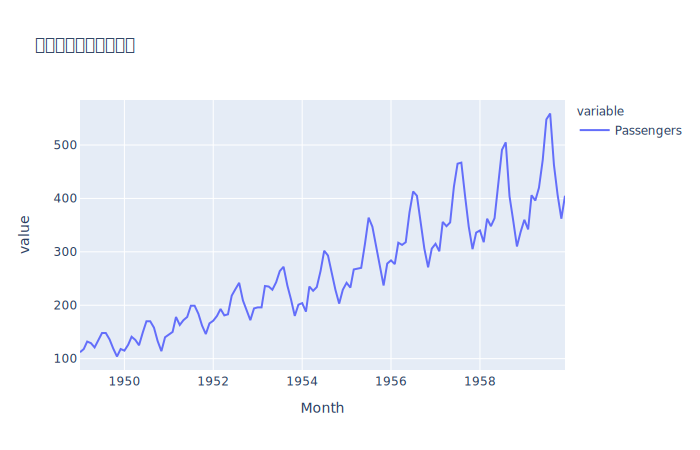

In [39]:
data_fig.show('svg')

## 移动平均

* rolling 设定的 window 参数越大，它的平滑效果就越好
* 我分别使用了 4,8,12 做为参数，大家可以看一下效果
* 大家看 SMA_Passengers12 比较好的展现了真实的年比年增长斜线
* 因为这个数据是月空乘数，所以一个周期是12个月，所以这里选12会比较好


In [40]:
#* 为了方便数据对比，创建 data 的一副本: sma_data (使用 df.copy 函数)
sma_data  = data.copy()

#* 为 sma_data 的 Passengers 列求4个月的移动平均, 放到 sma_data 的 SMA_Passengers4 列
#* 为 sma_data 的 Passengers 列求8个月的移动平均，放到 sma_data 的 SMA_Passengers4 列
#* 为 sma_data 的 Passengers 列求12个月的移动平均，放到 sma_data 的 SMA_Passengers4 列
sma_data['SMA_Passengers4'] = sma_data['Passengers'].rolling(window=4).mean()
sma_data['SMA_Passengers8'] = sma_data['Passengers'].rolling(window=8).mean()
sma_data['SMA_Passengers12'] = sma_data['Passengers'].rolling(window=12).mean()

sma_data.head()

,Passengers,SMA_Passengers4,SMA_Passengers8,SMA_Passengers12
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN
1949-04-01,129,122.75,NaN,NaN
1949-05-01,121,125.00,NaN,NaN


In [41]:
sma_data.plot()

In [42]:
# 对 sma_data 画折线图
# 试着画图展示一下原始数据 (非题目)
sma_fig = px.line(sma_data,y=['Passengers','SMA_Passengers12'],title = "澳洲空乘客流趋势线！")
sma_fig.show()

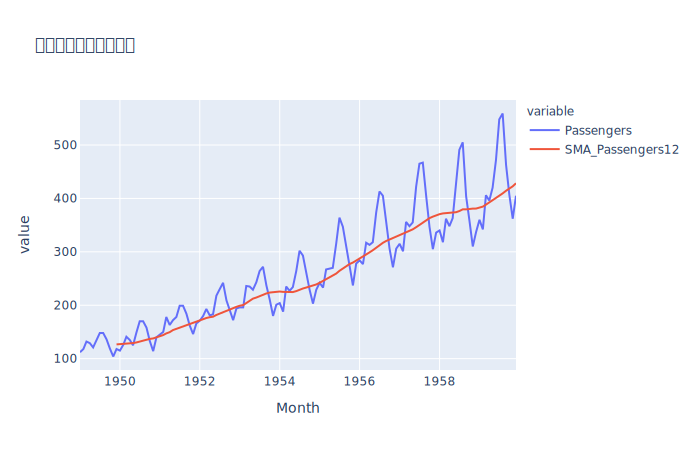

In [10]:
# 为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
# 大家把这张图打出来，在 SMA_Passengers12 上做上标注就可以交给 Leader 了！
sma_fig.show('svg')

# 5. 尝试分析美国新冠疫情的转折点
---
备注：这里综合了 p194的内容，同时我们也会介绍很多书上没有的知识

*  如果30天均线在10天之上，一般表示数据要往下走

* 如果10天均线在30天之上，一般表示数据要往上走

* 10天/30天均线交叉也要看开口大小，一般来说开口越大，走势越明朗

* pd.read_json 读取一个 json 文件

* df.T  将 DataFrame 对象里的行和列对调
---

背景:

* 你负责品牌的数据分析工作
* 现在美国的新冠疫情十分的严重，老板非常迫切的想知道这个疫情什么会转折
* 还好现在美国疾控中心 CDC，放出了[每天新增案例数](https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html)
  ![CDC新增案例数示意图](cdc_new_cases.jpg)
* 我们使用10天移动平均线，30天移动平均线来看疫情的走势
* 同时我们也要学会了解外部事件对事件的影响


---

* [移动平均简单介绍](https://www.gupiaoxing.com/rumen/201911/1735.html)
* [pandas --移动窗口rolling的概念](https://blog.csdn.net/maymay_/article/details/80241627)


我们使用美国 CDC的官方拉取最新数据（学有余力选学）

* 我们从 美国 CDC 接口拉取日新增数据
* 由于数据是 json 格式，使用 pd.read_json 读取后是一张如下图所示的长表
![](long_table1.jpg)
* 将数据进行列转换 df.T
* 因为行列转换, 系统把表头["x","data1","data2"] 也当成一行了

  所有用 df.iloc[1:,] 把第一行删掉生成新的数据
  
* 同时再把 raw_data 里的 new_num/sma7 两列转成数字  

In [43]:
# 选学题！
url = "https://www.cdc.gov/coronavirus/2019-ncov/json/new-cases-chart-data.json"
raw_data = pd.read_json(url).T.iloc[1:,]
raw_data.columns = ['day','new_num','sma7']
print("原始数据类型:")
print(raw_data.dtypes)
raw_data['new_num'] = raw_data['new_num'].astype(int)
raw_data['sma7'] = raw_data['sma7'].astype(int)
print("转换后数据类型:")
print(raw_data.dtypes)
raw_data.to_excel("us_daily.xlsx",index = False)
raw_data

原始数据类型:
day        object
new_num    object
sma7       object
dtype: object
转换后数据类型:
day        object
new_num     int64
sma7        int64
dtype: object


,day,new_num,sma7
1,1/22/2020,1,0
2,1/23/2020,0,0
3,1/24/2020,1,0
4,1/25/2020,0,0
5,1/26/2020,3,1
...,...,...,...
192,7/31/2020,68605,63324
193,8/01/2020,58947,62519
194,8/02/2020,47576,60488
195,8/03/2020,49716,59812


* 如果 [接口](https://www.cdc.gov/coronavirus/2019-ncov/json/new-cases-chart-data.json) 失效可以读取本地备份文件
* 把下面两行代码的注释打开即可

In [44]:
#raw_data = pd.read_excel("us_daily-2020-08-05.xlsx")
#raw_data

In [45]:
# 把 raw_data 里的 day 列，由转成日期类型 (pd.to_datetime)
# 并把 day 列设定为索引 (df.set_index), 把数据放到 virus
raw_data['day'] = pd.to_datetime(raw_data['day'])
virus = raw_data.set_index('day')
virus

,new_num,sma7
day,,
2020-01-22,1,0
2020-01-23,0,0
2020-01-24,1,0
2020-01-25,0,0
2020-01-26,3,1
...,...,...
2020-07-31,68605,63324
2020-08-01,58947,62519
2020-08-02,47576,60488


In [46]:
# 把 virus 里的数据画出来, 查看数据变化趋势 (px.line)
virus_fig = px.line(virus,y=["new_num","sma7"],title="美国每天新增感染人数！")
virus_fig.show()

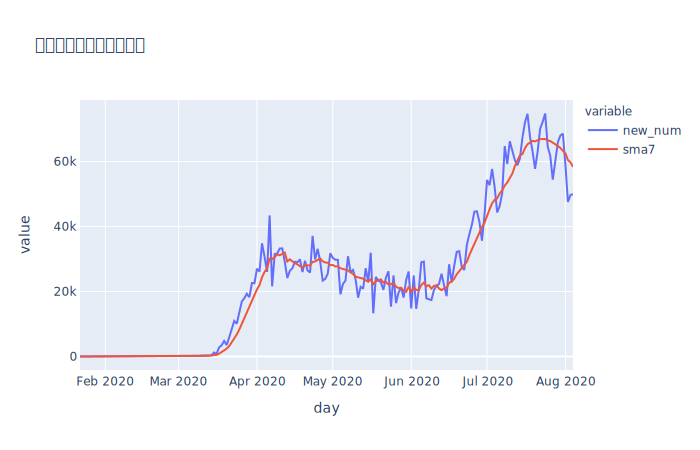

In [47]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
virus_fig.show('svg')

In [48]:
# 为 virus 创建一个数据复本 new_virus, 方便前后对比数据 (df.copy)
new_virus = virus.copy()
# 为 new_virus 的 new_num 列求10天的移动平均, 放到 new_virus 的 SMA_10 列
# 为 new_virus 的 new_num 列求30天的移动平均, 放到 new_virus 的 SMA_30 列
# 只取 new_virus ["new_num","SMA_10","SMA_30"] 3列数据，覆盖原来的 new_virus
new_virus['SMA_10'] = new_virus['new_num'].rolling(window=10).mean()
new_virus['SMA_30'] = new_virus['new_num'].rolling(window=30).mean()
new_virus = new_virus[["new_num","SMA_10","SMA_30"]]
new_virus.head()

,new_num,SMA_10,SMA_30
day,,,
2020-01-22,1,NaN,NaN
2020-01-23,0,NaN,NaN
2020-01-24,1,NaN,NaN
2020-01-25,0,NaN,NaN
2020-01-26,3,NaN,NaN


In [49]:
# 把 virus 里的数据画出来, 查看数据变化趋势 (px.line)
# 我们看到在 4.28 有一个下降转折点
#          6.18 有一个上升转折点 （大家想想这是为什么）
#          8.2  开始又有一个下降转折点
new_virus_fig = px.line(new_virus,y=["new_num","SMA_10","SMA_30"],title="美国新感染人数趋势分析！")
new_virus_fig.show()

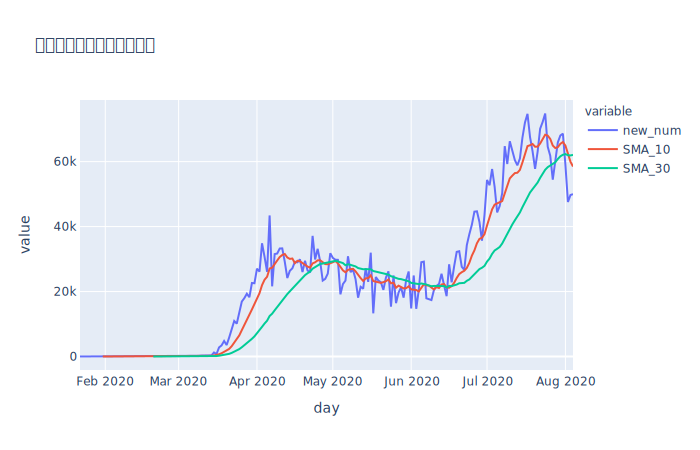

In [18]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
new_virus_fig.show('svg')

# 6. 分析美国公司的股票
---
备注：这里综合了 p202，p206,213的内容，同时我们也会介绍很多书上没有的知识

同学们这一章我尽量使用从网上的各种实时接口读取数据，而不是从本地文件读取，我有两个诉求:

* 用实时的数据来解释问题，当3个月后/3年后大家跑这个程序还是有代入感

* 让大家慢慢有数据接口思维，把所有的数据都想像成一个个接口（水/电）

---
使用的函数：

* pdr.get_data_yahoo 从yahoo网站读取指定股票代号的股价及交易信息(p202)

* px.line plotly express 画折线图的一个函数

* fig.update_xaxes(rangeslider_visible=True) 为折线图增加时间区域选择器

* df.resample 数据重新采样，比如把以天为纬度的数据，变成以周/季度为纬度的数据(p206,p213)

  大家想想自己在日常工作是不是经常要把天的数据按周/月/季度/年进行汇总转换，这非常有用

---

背景:

* 这本书快学完了，老师让要分析一下美股玩一下
* 会让从Yahoo自动下载 Tesla/Google/Apple三家公司的股票交易信息
* 我们想同时对比3家公司的股票信息
* 同时还想年看看 Amazon的股票按季度的波动情况

---



---

* [移动平均简单介绍](https://www.gupiaoxing.com/rumen/201911/1735.html)

In [19]:
# 安装 pandas_datareader 包，在这里的主要目的是用来读取股票交易数据
# 如果安装成功，请在 !pip 前增加一个 #, 把这个行安装代码注释掉，不要重复安装
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://pip.anker-in.com/simple


In [50]:
# 导入 pandas_datareader 包，并设定别名 pdr
import pandas_datareader as pdr
# 读取 tesla 的近期股票交易信息, tesla的股票代号 TSLA (pdr.get_data_yahoo)
tesla = pdr.get_data_yahoo("TSLA")
tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-07,243.729996,238.389999,243.580002,242.509995,5073400,242.509995
2015-08-10,242.970001,236.050003,238.149994,241.139999,4185900,241.139999
2015-08-11,239.300003,234.440002,237.149994,237.369995,4264900,237.369995
2015-08-12,239.770004,232.740005,235.000000,238.169998,3728000,238.169998
2015-08-13,246.479996,239.119995,239.860001,242.509995,4689200,242.509995
...,...,...,...,...,...,...
2020-07-30,1513.239990,1471.000000,1488.000000,1487.489990,7621000,1487.489990
2020-07-31,1517.050049,1420.979980,1515.000000,1430.760010,12247000,1430.760010
2020-08-03,1509.810059,1444.380005,1449.199951,1485.000000,8809300,1485.000000


In [51]:
# 使用 px.line 画出 Tesla股票走势(每天的最高价 High，最低价 Low)
# 第一个参数是要画的 tesla DataFrame
# 由于 tesla 的有了日期索引，所以不用指定 x 参数
# y = ["col_name2","col_name2"]
# 指定标题 title = "Tesla股票走势"
fig = px.line(
    tesla,
    y=['High','Low'],
    title="Tesla股票走势"
)
    
fig.show()

In [52]:
# 读取 Google 的近期股票交易信息, tesla的股票代号 GOOGL (pdr.get_data_yahoo)
google = pdr.get_data_yahoo("GOOGL")
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-07,668.799988,658.869995,667.780029,664.390015,1377200,664.390015
2015-08-10,671.619995,660.229980,667.090027,663.140015,1722900,663.140015
2015-08-11,704.000000,684.320007,699.580017,690.299988,5494000,690.299988
2015-08-12,696.000000,680.510010,694.489990,691.469971,2924900,691.469971
2015-08-13,694.030029,682.179993,689.200012,686.510010,1817700,686.510010
...,...,...,...,...,...,...
2020-07-30,1540.890015,1495.170044,1497.969971,1538.369995,1802100,1538.369995
2020-07-31,1505.020020,1454.000000,1497.050049,1487.949951,4576400,1487.949951
2020-08-03,1497.729980,1471.719971,1491.000000,1482.760010,2274100,1482.760010


In [53]:
# 使用 px.line 画出 Google股票走势(每天的最高价 High，最低价 Low)
# 第一个参数是要画的 google DataFrame
# 由于 tesla 的有了日期索引，所以不用指定 x 参数
# y = ["col_name2","col_name2"]
# 指定标题 title = "Google股票走势"
fig = px.line(
    google,  
    y=['High','Low'],
    title="Google股票走势"
)
fig.show()

In [54]:
# 读取 Amazon 的近期股票交易信息, Amazon 的股票代号 AMZN (pdr.get_data_yahoo)
amazon = pdr.get_data_yahoo("AMZN")
amazon

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-07,529.460022,518.210022,529.159973,522.619995,3969200,522.619995
2015-08-10,532.280029,523.000000,528.520020,524.000000,2615900,524.000000
2015-08-11,528.979980,522.000000,523.650024,527.460022,2676600,527.460022
2015-08-12,527.500000,513.059998,523.750000,525.909973,3962300,525.909973
2015-08-13,534.659973,525.489990,527.369995,529.659973,2895200,529.659973
...,...,...,...,...,...,...
2020-07-30,3092.000000,3005.000000,3014.000000,3051.879883,6128300,3051.879883
2020-07-31,3246.820068,3151.000000,3244.000000,3164.679932,8085500,3164.679932
2020-08-03,3184.000000,3104.000000,3180.510010,3111.889893,5074700,3111.889893


In [55]:
# 查看 tesla 的索引(非题目)
tesla.index

DatetimeIndex(['2015-08-07', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-17', '2015-08-18',
               '2015-08-19', '2015-08-20',
               ...
               '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03',
               '2020-08-04', '2020-08-05'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [56]:
# 查看 google 的索引(非题目)
google.index

DatetimeIndex(['2015-08-07', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-17', '2015-08-18',
               '2015-08-19', '2015-08-20',
               ...
               '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03',
               '2020-08-04', '2020-08-05'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [57]:
# 查看 amazon 的索引(非题目)
amazon.index

DatetimeIndex(['2015-08-07', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-17', '2015-08-18',
               '2015-08-19', '2015-08-20',
               ...
               '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03',
               '2020-08-04', '2020-08-05'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [59]:
# 经过前面的分析，发现在 tesla/google/amazon 3个数据的索引都一致
# 我们使用 google 索引(index) 构建了一个的 DataFrame : new_df
new_df = pd.DataFrame(index=google.index)

# 把 tesla 的 调整价格("adj Close") 放到 new_df 里的 tesla 列
# 把 google 的 调整价格("adj Close") 放到 new_df 里的 google 列
# 把 amazon 的 调整价格("adj Close") 放到 new_df 里的 amazon 列

new_df["tesla"] = tesla['Adj Close']
new_df["google"] = google['Adj Close']
new_df["amazon"] = amazon['Adj Close']


In [60]:
# 使用 px.line 画出  tesla/google/amazon 三家公司的股票走势
fig = px.line(new_df,  y=['tesla','google','amazon'])
fig.show()

In [61]:
# 我们使用 amazon 索引(index) 构建了一个的 DataFrame : amazon_df
amazon_df = pd.DataFrame(index=amazon.index)

# 把 amazon 里的调整价格("Adj Close") 放到 amazon_df 的 stock_price 列
amazon_df['stock_price'] = amazon['Adj Close']

amazon_df_fig = px.line(amazon_df,y=["stock_price"],title="Amazon 股价走势！")
amazon_df_fig.show()

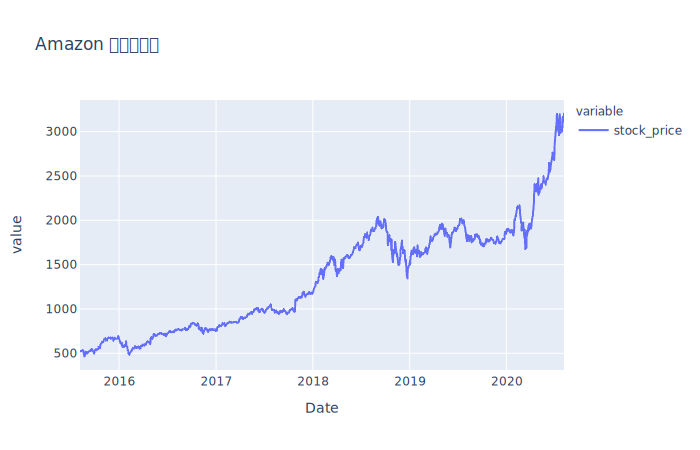

In [62]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
amazon_df_fig.show('svg')

In [64]:
# 为 amazon_df 创建一个复本(copy) amazon_df_copy
amazon_df_copy = amazon_df.copy()

# 为 amazon_df_copy 的 stock_price 列求10天的移动平均, 放到 amazon_df_copy 的 SMA_10 列
# 为 amazon_df_copy 的 stock_price 列求10天的移动平均, 放到 amazon_df_copy 的 SMA_10 列
amazon_df_copy['SMA_10'] = amazon_df_copy['stock_price'].rolling(window=10).mean()
amazon_df_copy['SMA_30'] = amazon_df_copy['stock_price'].rolling(window=30).mean()

# 使用 px.line 画出 Amazon股票走势 ["stock_price","SMA_10","SMA_30"]
# 第一个参数是要画的 amazon_df_copy DataFrame
# 由于 amazon_df_copy 的有了日期索引，所以不用指定 x 参数
# y = amazon_df_copy
# 指定标题 title = "Amazon 股票走势!"
# update_xaxes(rangeslider_visible=True) 增加了时间选择器，方便查看更长期的数据

amazon_fig = px.line(amazon_df_copy, y = ["stock_price","SMA_10","SMA_30"],title = "Amazon 股票走势!")
amazon_fig.update_xaxes(rangeslider_visible=True)
amazon_fig.show()

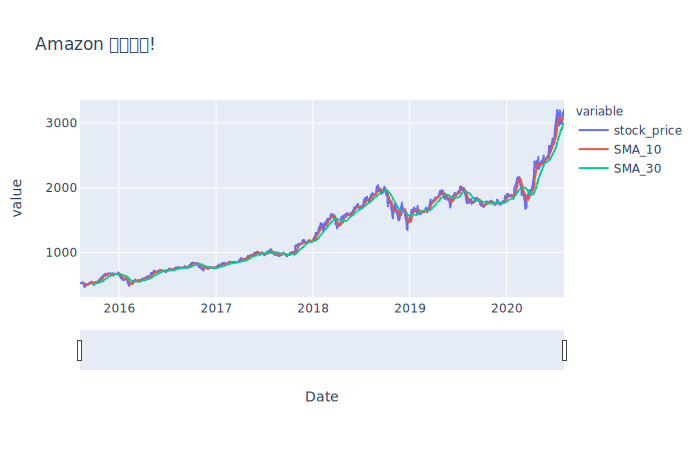

In [65]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
amazon_fig.show('svg')

In [66]:
# 对 amazon_df 按季度(Q) 重采样(resample), 
# 再分别调用 min/max/median/mean 算出最小，最大，中位，平均值
# 再用 pd.concat 把它们按列合并起来(axis = 1)

amazon_stats = pd.concat([
    amazon_df.resample('Q').min(),
    amazon_df.resample('Q').max(),
    amazon_df.resample('Q').median(),
    amazon_df.resample('Q').mean()    
],axis=1)
print(amazon_stats.columns)

# 将 amazon_stats 的4列分别重命名为:  ["min","max","median","mean"]
amazon_stats.columns = ["min","max","median","mean"]
amazon_stats

Index(['stock_price', 'stock_price', 'stock_price', 'stock_price'], dtype='object')


,min,max,median,mean
Date,,,,
2015-09-30,463.369995,548.390015,522.304993,518.274475
2015-12-31,520.719971,693.969971,658.274994,630.406720
2016-03-31,482.070007,636.989990,571.770020,567.619671
2016-06-30,586.140015,728.239990,698.740021,676.453437
2016-09-30,725.679993,837.309998,764.250000,765.451872
2016-12-31,719.070007,844.359985,771.400024,783.699846
2017-03-31,753.669983,886.539978,842.950012,833.496454
2017-06-30,884.669983,1011.340027,959.840027,954.157619
2017-09-30,938.599976,1052.800049,978.760010,982.421745


In [67]:
# 非题目
amazon_stats_fig = px.line(amazon_stats,y=["min","max","median","mean"],title="Amazon 股价季度波动图！")
amazon_stats_fig.show()

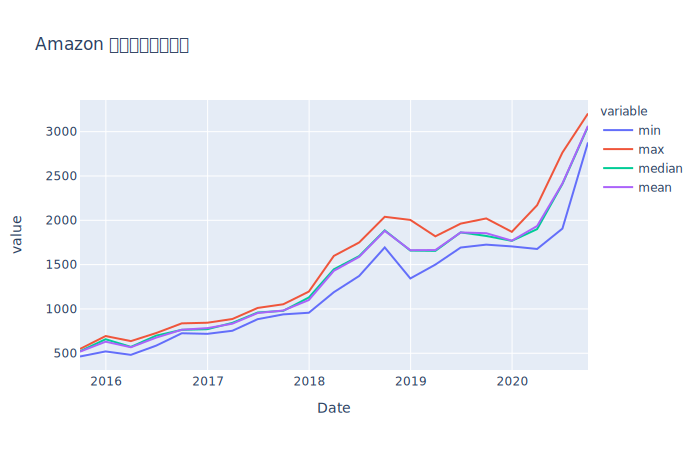

In [68]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
amazon_stats_fig.show('svg')

In [69]:
# 对 amazon_df 按 周(W) 重采样(resample), 
# 非题目
amazon_df_w_fig = amazon_df.resample('W').mean().plot()
amazon_df_w_fig.show()

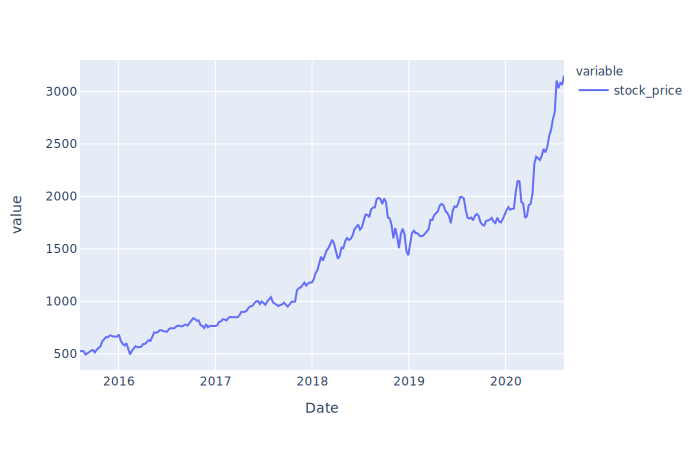

In [70]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
amazon_df_w_fig.show('svg')

# 7. 超级课后大作业
* 尝试着把你的业务数据套用进去
* 看看你的数据现在是在增长还是在下降
* 看看你的数据现在是在增长还是在下降转折点
* 那如果你现在在看100个SKU的销售情况/广告情况/其它数据，你怎么自动判断转折点

# 8. 参考资料

* [移动平均简单介绍](https://www.gupiaoxing.com/rumen/201911/1735.html)
* [平滑异同移动平均线MACD简介](https://zhuanlan.zhihu.com/p/58269086)
* [pandas --移动窗口rolling的概念](https://blog.csdn.net/maymay_/article/details/80241627)
* [pandas分析之--read_json()函数解析](https://blog.csdn.net/qq_41562377/article/details/90203805)
* [Python之简单股票数据分析](https://zhuanlan.zhihu.com/p/35360694)
* [Plotly 画时间序列图](https://plotly.com/python/time-series/)
* [【金融数据处理Tricks】Resample](https://zhuanlan.zhihu.com/p/35016415) Peter推荐